In [42]:
import pandas as pd
import nltk
from nltk.util import ngrams
import re
import string
import numpy as np
import matplotlib.pyplot as plt

In [43]:
digital_videogames_df = pd.read_pickle('digital_videogames_df.pkl')

In [44]:
digital_videogames_df

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,review_body_clean,review_language
0,US,21269168,RSH1OZ87OYK92,B013PURRZW,603406193,Madden NFL 16 - Xbox One Digital Code,Digital_Video_Games,2,2,3,N,N,A slight improvement from last year.,I keep buying madden every year hoping they ge...,2015-08-31,i keep buying madden every year hoping they ge...,en
1,US,133437,R1WFOQ3N9BO65I,B00F4CEHNK,341969535,Xbox Live Gift Card,Digital_Video_Games,5,0,0,N,Y,Five Stars,Awesome,2015-08-31,awesome,af
2,US,45765011,R3YOOS71KM5M9,B00DNHLFQA,951665344,Command & Conquer The Ultimate Collection [Ins...,Digital_Video_Games,5,0,0,N,Y,Hail to the great Yuri!,If you are prepping for the end of the world t...,2015-08-31,if you are prepping for the end of the world t...,en
3,US,113118,R3R14UATT3OUFU,B004RMK5QG,395682204,Playstation Plus Subscription,Digital_Video_Games,5,0,0,N,Y,Five Stars,Perfect,2015-08-31,perfect,en
4,US,22151364,RV2W9SGDNQA2C,B00G9BNLQE,640460561,Saints Row IV - Enter The Dominatrix [Online G...,Digital_Video_Games,5,0,0,N,Y,Five Stars,Awesome!,2015-08-31,awesome,af
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144719,US,53011810,R2G7DI8NYXZB5R,B001AUEITS,163061733,Crazy Machines 2 [Download],Digital_Video_Games,4,2,3,N,N,Worked first try for me,"I was worried due to the 2 reviews I saw here,...",2008-12-25,i was worried due to the reviews i saw here ...,en
144720,US,53094564,R3QRKP4DS759BP,B001AU6TQ8,801870836,Crazy Machines 1 - The Wacky Contraptions Game...,Digital_Video_Games,1,13,16,N,N,"The Software May be Great, But I'll Never Know",I downloaded this as a Christmas present for m...,2008-12-24,i downloaded this as a christmas present for m...,en
144721,US,37181147,R24K4C0ZC3093U,B001AUEITS,163061733,Crazy Machines 2 [Download],Digital_Video_Games,3,3,3,N,N,Some install problems but good otherwise,The previous reviewer is correct in noting tha...,2008-09-10,the previous reviewer is correct in noting tha...,en
144722,US,18614365,R13OA3TRCM8IBM,B001AUEITS,163061733,Crazy Machines 2 [Download],Digital_Video_Games,1,20,22,N,N,Do Not Download This!,I downloaded this for my son's birthday yester...,2008-09-01,i downloaded this for my son s birthday yester...,en


In [46]:
# removing 3 star reviews
digital_videogames_df = digital_videogames_df[digital_videogames_df.star_rating!=3]

In [47]:
digital_videogames_df['sentiment'] = np.where(digital_videogames_df['star_rating'] >= 4, 'positive', 'negative')

In [48]:
digital_videogames_df

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,review_body_clean,review_language,sentiment
0,US,21269168,RSH1OZ87OYK92,B013PURRZW,603406193,Madden NFL 16 - Xbox One Digital Code,Digital_Video_Games,2,2,3,N,N,A slight improvement from last year.,I keep buying madden every year hoping they ge...,2015-08-31,i keep buying madden every year hoping they ge...,en,negative
1,US,133437,R1WFOQ3N9BO65I,B00F4CEHNK,341969535,Xbox Live Gift Card,Digital_Video_Games,5,0,0,N,Y,Five Stars,Awesome,2015-08-31,awesome,af,positive
2,US,45765011,R3YOOS71KM5M9,B00DNHLFQA,951665344,Command & Conquer The Ultimate Collection [Ins...,Digital_Video_Games,5,0,0,N,Y,Hail to the great Yuri!,If you are prepping for the end of the world t...,2015-08-31,if you are prepping for the end of the world t...,en,positive
3,US,113118,R3R14UATT3OUFU,B004RMK5QG,395682204,Playstation Plus Subscription,Digital_Video_Games,5,0,0,N,Y,Five Stars,Perfect,2015-08-31,perfect,en,positive
4,US,22151364,RV2W9SGDNQA2C,B00G9BNLQE,640460561,Saints Row IV - Enter The Dominatrix [Online G...,Digital_Video_Games,5,0,0,N,Y,Five Stars,Awesome!,2015-08-31,awesome,af,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144718,US,40583756,R3V7BTATZVG5SO,B001AUEITS,163061733,Crazy Machines 2 [Download],Digital_Video_Games,1,2,2,N,N,Should have ordered the disc.,I am now downloading this game for the third t...,2008-12-28,i am now downloading this game for the third t...,en,negative
144719,US,53011810,R2G7DI8NYXZB5R,B001AUEITS,163061733,Crazy Machines 2 [Download],Digital_Video_Games,4,2,3,N,N,Worked first try for me,"I was worried due to the 2 reviews I saw here,...",2008-12-25,i was worried due to the reviews i saw here ...,en,positive
144720,US,53094564,R3QRKP4DS759BP,B001AU6TQ8,801870836,Crazy Machines 1 - The Wacky Contraptions Game...,Digital_Video_Games,1,13,16,N,N,"The Software May be Great, But I'll Never Know",I downloaded this as a Christmas present for m...,2008-12-24,i downloaded this as a christmas present for m...,en,negative
144722,US,18614365,R13OA3TRCM8IBM,B001AUEITS,163061733,Crazy Machines 2 [Download],Digital_Video_Games,1,20,22,N,N,Do Not Download This!,I downloaded this for my son's birthday yester...,2008-09-01,i downloaded this for my son s birthday yester...,en,negative


In [49]:
digital_videogames_df.sentiment.value_counts(normalize=True)

positive    0.755324
negative    0.244676
Name: sentiment, dtype: float64

In [50]:
digital_videogames_df.sentiment.value_counts()

positive    100560
negative     32575
Name: sentiment, dtype: int64

In [15]:
test = "Hello, this is a test string. Isn't it a (great) string?"

In [16]:
re.sub(r'[^ a-zA-Z0-9]', '', test)

'Hello this is a test string Isnt it a great string'

In [17]:
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

In [18]:
digital_videogames_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133135 entries, 0 to 144723
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   marketplace        133135 non-null  object
 1   customer_id        133135 non-null  int64 
 2   review_id          133135 non-null  object
 3   product_id         133135 non-null  object
 4   product_parent     133135 non-null  int64 
 5   product_title      133135 non-null  object
 6   product_category   133135 non-null  object
 7   star_rating        133135 non-null  int64 
 8   helpful_votes      133135 non-null  int64 
 9   total_votes        133135 non-null  int64 
 10  vine               133135 non-null  object
 11  verified_purchase  133135 non-null  object
 12  review_headline    133133 non-null  object
 13  review_body        133133 non-null  object
 14  review_date        133132 non-null  object
 15  sentiment          133135 non-null  object
dtypes: int64(5), object(

In [19]:
digital_videogames_df.dtypes

marketplace          object
customer_id           int64
review_id            object
product_id           object
product_parent        int64
product_title        object
product_category     object
star_rating           int64
helpful_votes         int64
total_votes           int64
vine                 object
verified_purchase    object
review_headline      object
review_body          object
review_date          object
sentiment            object
dtype: object

In [20]:
digital_videogames_df['review_body'] = digital_videogames_df['review_body'].apply(str)

<ipython-input-20-39d56506beb8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  digital_videogames_df['review_body'] = digital_videogames_df['review_body'].apply(str)


In [21]:
digital_videogames_df.dtypes

marketplace          object
customer_id           int64
review_id            object
product_id           object
product_parent        int64
product_title        object
product_category     object
star_rating           int64
helpful_votes         int64
total_votes           int64
vine                 object
verified_purchase    object
review_headline      object
review_body          object
review_date          object
sentiment            object
dtype: object

In [22]:
digital_videogames_df['review_body'] = digital_videogames_df.review_body.map(alphanumeric).map(punc_lower)

digital_videogames_df.head()

<ipython-input-22-c0fec117f632>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  digital_videogames_df['review_body'] = digital_videogames_df.review_body.map(alphanumeric).map(punc_lower)


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
0,US,21269168,RSH1OZ87OYK92,B013PURRZW,603406193,Madden NFL 16 - Xbox One Digital Code,Digital_Video_Games,2,2,3,N,N,A slight improvement from last year.,i keep buying madden every year hoping they ge...,2015-08-31,negative
1,US,133437,R1WFOQ3N9BO65I,B00F4CEHNK,341969535,Xbox Live Gift Card,Digital_Video_Games,5,0,0,N,Y,Five Stars,awesome,2015-08-31,positive
2,US,45765011,R3YOOS71KM5M9,B00DNHLFQA,951665344,Command & Conquer The Ultimate Collection [Ins...,Digital_Video_Games,5,0,0,N,Y,Hail to the great Yuri!,if you are prepping for the end of the world t...,2015-08-31,positive
3,US,113118,R3R14UATT3OUFU,B004RMK5QG,395682204,Playstation Plus Subscription,Digital_Video_Games,5,0,0,N,Y,Five Stars,perfect,2015-08-31,positive
4,US,22151364,RV2W9SGDNQA2C,B00G9BNLQE,640460561,Saints Row IV - Enter The Dominatrix [Online G...,Digital_Video_Games,5,0,0,N,Y,Five Stars,awesome,2015-08-31,positive


In [23]:
digital_videogames_df['review_body'].isnull().values.any()

False

In [37]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def display_wordcloud(df):
    wordcloud = WordCloud(background_color='white',
                         stopwords = stopwords, 
                         max_words=300, 
                         max_font_size=40, 
                         scale=3,
                         random_state=42).generate(str(df))

    
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
#     if title: 
#         fig.suptitle(title, fontsize=20)
#         fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

In [28]:
digital_videogames_df.loc[digital_videogames_df['sentiment']=='positive']['review_body']

1                                                   awesome
2         if you are prepping for the end of the world t...
3                                                   perfect
4                                                  awesome 
5                                                  awesome 
                                ...                        
144715    you ll get plenty of hours of fun out of this ...
144716    hey  i just burned this one onto a cd  and put...
144717    when you are running out of points  there is n...
144719    i was worried due to the   reviews i saw here ...
144723    this game has all the makings of a wonderful t...
Name: review_body, Length: 100560, dtype: object

In [40]:
positive_reviews = digital_videogames_df.loc[digital_videogames_df['sentiment']=='positive']['review_body']
negative_reviews = digital_videogames_df.loc[digital_videogames_df['sentiment']=='negative']['review_body']
all_reviews = digital_videogames_df['review_body']

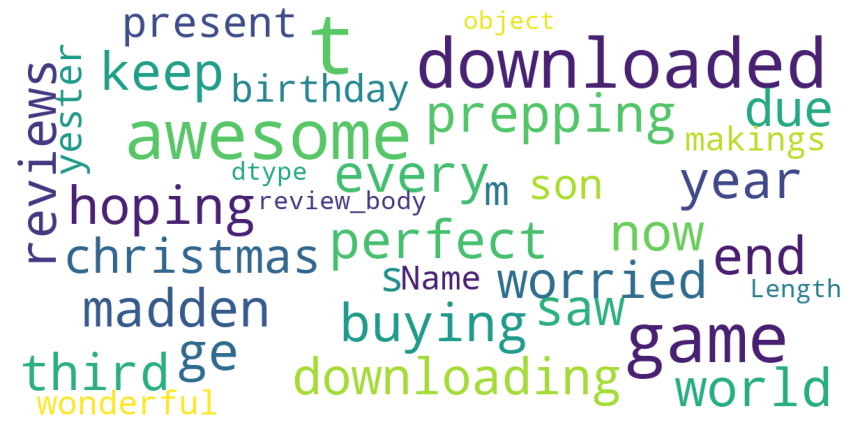

In [41]:
display_wordcloud(all_reviews)

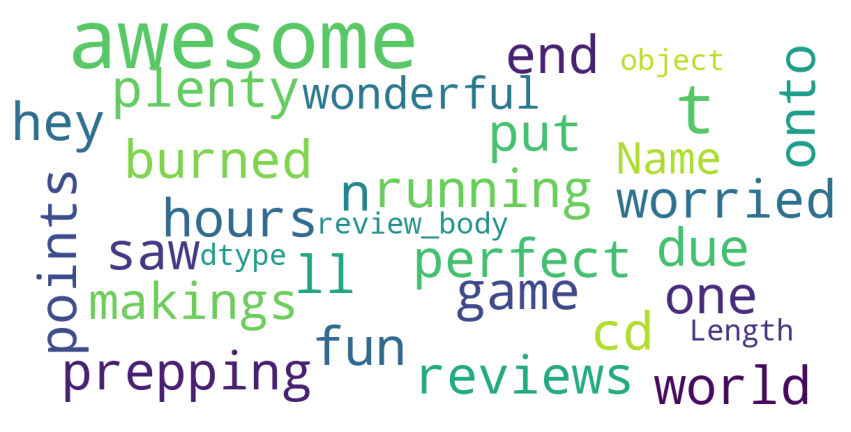

In [38]:
display_wordcloud(positive_reviews)

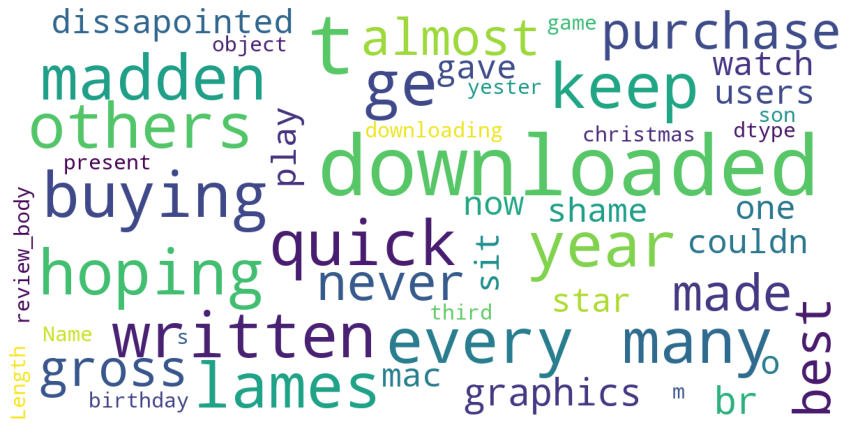

In [39]:
display_wordcloud(negative_reviews)

In [79]:
videogames_sample_df = digital_videogames_df.sample(1000)[['review_body', 'sentiment', 'product_title']]

In [80]:
videogames_sample_df.sentiment.value_counts(normalize=True)

positive    0.737
negative    0.263
Name: sentiment, dtype: float64

In [81]:
videogames_sample_df

,review_body,sentiment,product_title
68042,yes my product key worked right away thank you...,positive,Xbox $5 Gift Card - Xbox 360 Digital Code
52874,ordered this month membership for less than ...,positive,Xbox Live Subscription
77176,this game is utterly amazing and very underrat...,positive,Kingdoms of Amalur + DLC Bundle [Download]
124722,i loved this game years ago and was hoping for...,positive,Tom Clancy's Splinter Cell Double Agent
136076,i love this produte thanks i will buy anothe...,positive,Playstation Network Card
...,...,...,...
75745,i gave far cry a fair shake on the a while...,positive,Far Cry 3
4617,good game,positive,Race 07 [Download]
70030,games seems pretty good half way through and ...,positive,Max Payne 3
96094,everything seemed fine buy and download is sa...,positive,Hotel Giant 2 [Download]


In [82]:
import scattertext as st

In [83]:
corpus = st.CorpusFromPandas(videogames_sample_df,
                             category_col='sentiment',
                             text_col='review_body',
                             nlp=st.whitespace_nlp_with_sentences
                            ).build()

In [84]:
html = st.produce_scattertext_explorer(
        corpus,
        category='positive',
        category_name='Positive',
        not_category_name='Negative',
        minimum_term_frequency=10,
        pmi_threshold_coefficient=5,
        width_in_pixels=1000,
        metadata=videogames_sample_df['product_title'],
        )

In [85]:
open('videogames_df.html', 'wb').write(html.encode('utf-8'));

In [74]:
videogames_sample_df.sentiment.value_counts()

positive    66
negative    34
Name: sentiment, dtype: int64

### Stuff to Try:
1. Comparing 2 Games
2. 